In [20]:
from Bio import SeqIO
import os
from Bio import pairwise2

import pyrosetta
pyrosetta.init()

In [216]:
aas = {
        "A":"ALA",
        "B": "ASP",
        "C": "CYS",
        "L": "LEU",
        "I": "ILE",
        "V": "VAL",
        "G": "GLY",
        "S":"SER",
        "T":"THR",
        "P":"PRO",
        "Q":"GLN",
        "E":"GLU",
        "N": "ASN",
        "K": "LYS",
        'R': "ARG",
        "W": "TRP",
        "F":"PHE",
        "Y": "TYR",
        "H": "HIS",
        "M": "MET",
}

In [23]:
files = [fasta for fasta in os.listdir("wt") if fasta.endswith("fasta")]

with open(os.path.join("wt",files[0]), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        wt = record.seq

In [50]:
files = [fasta for fasta in os.listdir("lt") if fasta.endswith("fasta")]

with open(os.path.join("lt",files[0]), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        lt = record.seq

In [51]:
files = [fasta for fasta in os.listdir("gt") if fasta.endswith("fasta")]

with open(os.path.join("gt",files[0]), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        gt = record.seq

In [53]:
alignments = pairwise2.align.globalxx(wt, lt)
lt_gaps = [i for i, gap in enumerate(alignments[0].seqA) if gap =="-"]
alignments = pairwise2.align.globalxx(wt, gt)
gt_gaps = [i for i, gap in enumerate(alignments[0].seqA) if gap =="-"]

In [236]:
chm = pyrosetta.rosetta.core.chemical.ChemicalManager.get_instance()

rts = chm.residue_type_set("fa_standard")

for root, dirs,files in os.walk("gt"):

    for file in files:
        if file.startswith("unrelaxed"):
            print(os.path.join(root,file))

            pose = pyrosetta.pose_from_file(os.path.join(root,file))

            res_type = rts.name_map(aas[wt[gt_gaps[0]-1]])
            res = pyrosetta.rosetta.core.conformation.ResidueFactory.create_residue(res_type)
            pose.replace_residue(gt_gaps[0],res, False)

            res_type = rts.name_map(aas[wt[gt_gaps[1]-2]])
            res = pyrosetta.rosetta.core.conformation.ResidueFactory.create_residue(res_type)
            pose.replace_residue(gt_gaps[1]-1,res, False)
            
            pose.dump_pdb(os.path.join(root,"fixed.pdb"))

gt/structure_7/unrelaxed_structure_7_model_5_pred_0.pdb
core.import_pose.import_pose: File 'gt/structure_7/unrelaxed_structure_7_model_5_pred_0.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue VAL:CtermProteinFull 504
core.conformation.Conformation: Found disulfide between residues 61 70
core.conformation.Conformation: current variant for 61 CYS
core.conformation.Conformation: current variant for 70 CYS
core.conformation.Conformation: current variant for 61 CYD
core.conformation.Conformation: current variant for 70 CYD
gt/structure_0/unrelaxed_structure_0_model_5_pred_0.pdb
core.import_pose.import_pose: File 'gt/structure_0/unrelaxed_structure_0_model_5_pred_0.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue VAL:CtermProteinFull 504
gt/structure_9/unrelaxed_structure_9_model_5_pred_0.pdb
core.import_pose.import_pose: File 'gt/struct

In [237]:
chm = pyrosetta.rosetta.core.chemical.ChemicalManager.get_instance()

rts = chm.residue_type_set("fa_standard")

for root, dirs,files in os.walk("lt"):

    for file in files:
        if file.startswith("unrelaxed"):
            print(os.path.join(root,file))

            pose = pyrosetta.pose_from_file(os.path.join(root,file))

            res_type = rts.name_map(aas[wt[lt_gaps[0]-1]])
            res = pyrosetta.rosetta.core.conformation.ResidueFactory.create_residue(res_type)
            pose.replace_residue(lt_gaps[0],res, False)

            res_type = rts.name_map(aas[wt[gt_gaps[1]-2]])
            res = pyrosetta.rosetta.core.conformation.ResidueFactory.create_residue(res_type)
            pose.replace_residue(lt_gaps[1]-1,res, False)
            
            pose.dump_pdb(os.path.join(root,"fixed.pdb"))

lt/structure_7/unrelaxed_structure_7_model_5_pred_0.pdb
core.import_pose.import_pose: File 'lt/structure_7/unrelaxed_structure_7_model_5_pred_0.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue VAL:CtermProteinFull 504
lt/structure_0/unrelaxed_structure_0_model_5_pred_0.pdb
core.import_pose.import_pose: File 'lt/structure_0/unrelaxed_structure_0_model_5_pred_0.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue VAL:CtermProteinFull 504
lt/structure_9/unrelaxed_structure_9_model_5_pred_0.pdb
core.import_pose.import_pose: File 'lt/structure_9/unrelaxed_structure_9_model_5_pred_0.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue VAL:CtermProteinFull 504
lt/structure_8/unrelaxed_structure_8_model_5_pred_0.pdb
core.import_pose.import_pose: File 'lt/structure_8/unrel

In [75]:
# input_dirs = ['lt']


# for root, dirs, files in os.walk(".", topdown=False):

#     root_split = root.split("/")
#     if len(root_split) > 1 and root_split[1] in input_dirs and root_split[-1] == "structure_0":

#         print(root)
#         for file in files:
            
#             file_split = file.split(".")
#             if file_split[-1] == "pdb" and file.startswith("unrelaxed"):

#                 print(file)

# p = PDBParser




# structure = p.get_structure("2.A.1.9.10", "./2.A.1.9.10.fasta/structure_0/unrelaxed_structure_0_model_5.pdb")
# model = structure[0]
# dssp = DSSP(model,"./2.A.1.9.10.fasta/structure_0/unrelaxed_structure_0_model_5.pdb")

In [331]:
import os
import Bio
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import numpy
import numpy as np
import matplotlib.pyplot as plt

In [330]:


def extract_prop_from_key(key):
    return lambda x: x[key]

def get_map_list(func):
    return lambda x: list(map(func,x))

get_ss_ele = get_map_list(extract_prop_from_key(2))
get_id = get_map_list(extract_prop_from_key(0))
get_amino_acid = get_map_list(extract_prop_from_key(1))


def get_contiguous(ds_prop, ele_types = ["H"]):
    ds_dict = dict(zip(get_id(ds_prop), get_ss_ele(ds_prop)))

    helical_ids = dict(list(filter(lambda x: x[1] in ele_types, ds_dict.items()))).keys()
    start = None
    last = None
    helices = [] 
    for i in helical_ids:
        if last == None:
            last = i
            start = i

        if i == last+1:
            pass
        else:
            if start != last:
                helices.append((start,last))
            start = i

        last = i

    return helices

In [439]:
p = PDBParser()

structure = p.get_structure('struct_0',"lt/structure_0/unrelaxed_structure_0_model_5_pred_0.pdb")
model = structure[0]
dssp = DSSP(model,"lt/structure_0/unrelaxed_structure_0_model_5_pred_0.pdb")
get_contiguous(dssp)

structure1 = p.get_structure('struct_0',"gt/structure_0/unrelaxed_structure_0_model_5_pred_0.pdb")
model1 = structure1[0]
# dssp1 = DSSP(model1,"gt/structure_0/unrelaxed_structure_0_model_5_pred_0.pdb")

def rot_point_set(M, R):
    assert M.shape[-1] ==3
    get_diagonal = lambda x: (x[0][0], x[1][1], x[2][2])

    return numpy.array(list(map(get_diagonal, [point*R for point in M])))

def superimpose(from_model, to_model, resids=None):
    # Takes two models
    # Returns both models centered on the origin with the from_model rotated to the to_model


#     return M
    
    if resids == None:
        resids = [p for l in get_contiguous(dssp) for p in l ]
    
    to_coords = numpy.array([atom.get_coord() for atom in to_model.get_atoms() if atom.get_full_id()[3][1] in resids]).T
    from_coords = numpy.array([atom.get_coord() for atom in from_model.get_atoms() if  atom.get_full_id()[3][1] in resids]).T
    
    to_centroid = numpy.mean(to_coords,axis=1)
    from_centroid = numpy.mean(from_coords, axis=1)


    
    to_coords = (to_coords.T - to_centroid.T).T
    from_coords = (from_coords.T - from_centroid.T).T

    H = to_coords @ np.transpose(from_coords)
    
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T

#     print(np.linalg.det(R))
#     print(to_centroid)
#     print(from_centroid)
#     print(to_coords.T[0])
#     print(from_coords.T[0])

#     print(R)
#     print(to_coords.T[200])
#     print(from_coords.T[200])
    
    
    return (rot_point_set(from_coords.T,R), to_coords.T)
    


cd1, cd2 = superimpose(model,model1)

In [337]:


# Fixing random state for reproducibility
# np.random.seed(19680801)


# def randrange(n, vmin, vmax):
#     """
#     Helper function to make an array of random numbers having shape (n, )
#     with each number distributed Uniform(vmin, vmax).
#     """
#     return (vmax - vmin)*np.random.rand(n) + vmin

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# n = 100

# # For each set of style and range settings, plot n random points in the box
# # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, marker=m)

# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')

# plt.show()
# rot_point_set()

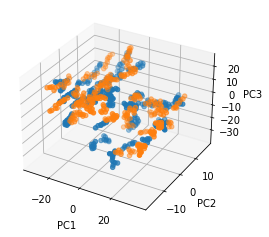

In [433]:
def scatter_3d(point_groups = [], axis_labels = ['PC1', 'PC2', 'PC3']):
    markers= ["o", "^"]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for pg in point_groups:
        xs = list(map(lambda x: x[0], pg))
        ys = list(map(lambda x: x[1], pg))
        zs = list(map(lambda x: x[2], pg))
        m = markers[0]
        ax.scatter(xs, ys, zs,marker=m)
    

    ax.set_xlabel(axis_labels[0])
    ax.set_ylabel(axis_labels[1])
    ax.set_zlabel(axis_labels[2])

    plt.show()

cd1_rot, cd2_rot = superimpose(model,model1)

scatter_3d(point_groups = [cd1,cd2])

In [441]:
# cd1, cd2 = superimpose(model,model1)
# scatter_3d(point_groups = [cd1,cd2])

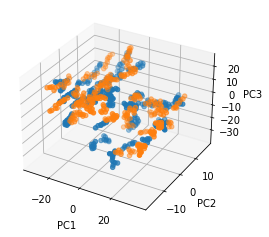

In [442]:
pg = [rot_point_set(cd1,[[1,0,0],[0,1,0],[0,0,1]]), cd2]
scatter_3d(point_groups=pg)